In [1]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
## データ読み込み
train_org = pd.read_csv("../data/train_set.csv", low_memory=False)
test_org = pd.read_csv("../data/test_set.csv", low_memory=False)

In [3]:
tr_r = train_org.query('SOURCE=="Residential"')
tr_c = train_org.query('SOURCE=="Condominium"')

In [4]:
# tr_r.corr()["PRICE"]
tr_c.corr()["PRICE"]

Id             -0.025347
BATHRM         -0.028177
HF_BATHRM      -0.009409
NUM_UNITS            NaN
ROOMS          -0.052759
BEDRM          -0.054361
AYB             0.055954
YR_RMDL         0.082851
EYB             0.057205
STORIES              NaN
SALE_NUM       -0.042717
GBA                  NaN
BLDG_NUM             NaN
KITCHENS             NaN
FIREPLACES      0.034000
USECODE        -0.006391
LANDAREA        0.009198
CMPLX_NUM      -0.030905
LIVING_GBA     -0.031445
ZIPCODE         0.002854
LATITUDE        0.078598
LONGITUDE      -0.113850
CENSUS_TRACT   -0.074612
X              -0.113850
Y               0.078598
PRICE           1.000000
Name: PRICE, dtype: float64

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


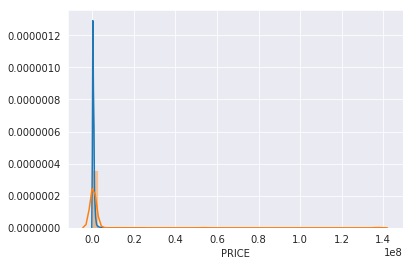

In [5]:
sns.distplot(tr_r["PRICE"])
sns.distplot(tr_c["PRICE"])

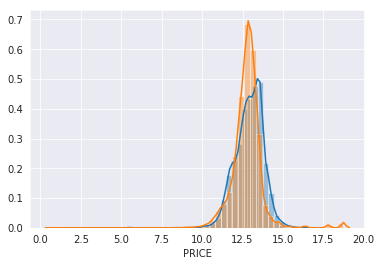

In [6]:
sns.distplot(np.log1p(tr_r["PRICE"]))
sns.distplot(np.log1p(tr_c["PRICE"]))

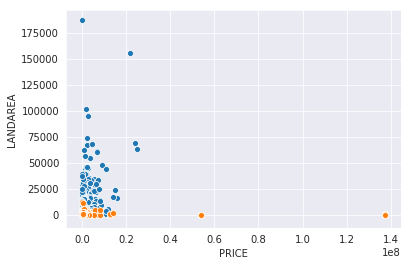

In [7]:
sns.scatterplot(tr_r["PRICE"], tr_r["LANDAREA"])
sns.scatterplot(tr_c["PRICE"], tr_c["LANDAREA"])

In [8]:
## 改めて値段を確認
train_org.groupby("PRICE")["Id"].count()

PRICE
1.0              3
10.0             2
250.0            8
500.0            3
936.0            1
1000.0           2
1377.0           1
4101.0           1
4156.0           1
4500.0           1
4850.0           1
5000.0           1
5185.0           1
5453.0           1
5643.0           1
6826.0           1
6950.0           1
7000.0           1
7500.0           2
8000.0           3
8500.0           1
9000.0           4
9020.0           1
9497.0           1
9500.0           1
10000.0          2
10011.0          1
10273.0          1
10400.0          1
10500.0          1
              ... 
6750000.0        1
6833333.0        1
7050000.0        1
7100000.0        1
7225000.0        1
7295000.0        1
7395000.0        1
7500000.0        1
7550000.0        2
7700000.0        1
8243685.0        2
8375000.0        1
8400000.0        1
8450000.0        2
8600000.0        1
9100000.0        1
10750000.0       1
11000000.0       2
11984000.0       1
12780000.0      40
14000000.0       1
141571

In [9]:
## 以上に高い/安い物件を除去
train = train_org.drop(
    train_org[(train_org["PRICE"]>=100000000) | (train_org["PRICE"]<=500)].index
)